In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv("transonic_airfoil_data_set-checkpoint.csv")
df.head()

,No,M,AoA,Cl,Cd,Cp
0,1,0.727928,2.449037,0.740129,0.013330,-0.911550
1,2,0.736393,2.389265,0.736667,0.015423,-1.218775
2,3,0.731969,2.251332,0.709717,0.013156,-1.122496
3,4,0.735015,2.388274,0.736197,0.014977,-1.214580
4,5,0.725872,2.448004,0.737060,0.012857,-0.697603


In [3]:
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (966, 6)


In [4]:
df = df.drop("No", axis=1)

In [5]:
df.corr()

,M,AoA,Cl,Cd,Cp
M,1.000000,-0.024015,0.164570,0.681272,-0.836605
AoA,-0.024015,1.000000,0.980460,0.673434,-0.270683
Cl,0.164570,0.980460,1.000000,0.778159,-0.421124
Cd,0.681272,0.673434,0.778159,1.000000,-0.799870
Cp,-0.836605,-0.270683,-0.421124,-0.799870,1.000000


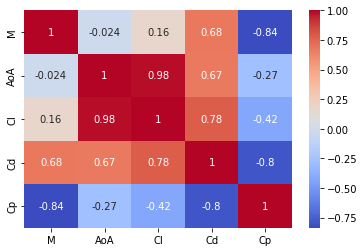

In [6]:
import seaborn as sns
df_heatmap = sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

In [7]:
df.isnull().sum()

M      0
AoA    0
Cl     0
Cd     0
Cp     0
dtype: int64

In [8]:
X = df.iloc[:, 0:2]
Y = df[["Cl"]]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [12]:
classifier = Sequential()

In [13]:
classifier.add(Dense(units=6, activation="relu"))
classifier.add(Dense(units=8, activation="relu"))
classifier.add(Dense(units=8, activation="relu"))
classifier.add(Dense(units=1, activation="linear"))

In [14]:
classifier.compile(optimizer="adam", loss="mse")

In [15]:
model_history = classifier.fit(x_train, y_train, validation_split=0.1, epochs=500)

Epoch 1/500
22/22 [==============================] - 1s 7ms/step - loss: 0.1300 - val_loss: 0.0601
Epoch 2/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0232 - val_loss: 0.0113
Epoch 3/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0097
Epoch 4/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0095
Epoch 5/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0093
Epoch 6/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0086
Epoch 7/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.0083
Epoch 8/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0078
Epoch 9/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0074
Epoch 10/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0069
Epoch 11/

22/22 [==============================] - 0s 5ms/step - loss: 1.4759e-05 - val_loss: 1.0438e-05
Epoch 80/500
22/22 [==============================] - 0s 2ms/step - loss: 1.4361e-05 - val_loss: 1.0219e-05
Epoch 81/500
22/22 [==============================] - 0s 2ms/step - loss: 1.4221e-05 - val_loss: 1.1495e-05
Epoch 82/500
22/22 [==============================] - 0s 2ms/step - loss: 1.4034e-05 - val_loss: 1.0367e-05
Epoch 83/500
22/22 [==============================] - 0s 2ms/step - loss: 1.4016e-05 - val_loss: 1.0145e-05
Epoch 84/500
22/22 [==============================] - 0s 2ms/step - loss: 1.3616e-05 - val_loss: 1.0347e-05
Epoch 85/500
22/22 [==============================] - 0s 2ms/step - loss: 1.3228e-05 - val_loss: 1.0344e-05
Epoch 86/500
22/22 [==============================] - 0s 2ms/step - loss: 1.3083e-05 - val_loss: 1.0676e-05
Epoch 87/500
22/22 [==============================] - 0s 2ms/step - loss: 1.2979e-05 - val_loss: 1.0319e-05
Epoch 88/500
22/22 [=====================

22/22 [==============================] - 0s 4ms/step - loss: 6.3435e-06 - val_loss: 5.7236e-06
Epoch 155/500
22/22 [==============================] - 0s 5ms/step - loss: 6.4612e-06 - val_loss: 5.8937e-06
Epoch 156/500
22/22 [==============================] - 0s 5ms/step - loss: 6.3471e-06 - val_loss: 5.6377e-06
Epoch 157/500
22/22 [==============================] - 0s 6ms/step - loss: 6.4585e-06 - val_loss: 5.4246e-06
Epoch 158/500
22/22 [==============================] - 0s 5ms/step - loss: 6.7014e-06 - val_loss: 6.9875e-06
Epoch 159/500
22/22 [==============================] - 0s 4ms/step - loss: 6.2150e-06 - val_loss: 5.6955e-06
Epoch 160/500
22/22 [==============================] - 0s 5ms/step - loss: 5.9603e-06 - val_loss: 6.3994e-06
Epoch 161/500
22/22 [==============================] - 0s 4ms/step - loss: 5.9939e-06 - val_loss: 7.0088e-06
Epoch 162/500
22/22 [==============================] - 0s 4ms/step - loss: 6.0065e-06 - val_loss: 5.5403e-06
Epoch 163/500
22/22 [============

22/22 [==============================] - 0s 2ms/step - loss: 6.0549e-06 - val_loss: 7.0961e-06
Epoch 230/500
22/22 [==============================] - 0s 3ms/step - loss: 5.7997e-06 - val_loss: 4.7261e-06
Epoch 231/500
22/22 [==============================] - 0s 2ms/step - loss: 4.6436e-06 - val_loss: 5.0023e-06
Epoch 232/500
22/22 [==============================] - 0s 2ms/step - loss: 4.8432e-06 - val_loss: 4.7452e-06
Epoch 233/500
22/22 [==============================] - 0s 2ms/step - loss: 4.6230e-06 - val_loss: 4.9200e-06
Epoch 234/500
22/22 [==============================] - 0s 2ms/step - loss: 4.6212e-06 - val_loss: 4.7808e-06
Epoch 235/500
22/22 [==============================] - 0s 2ms/step - loss: 5.5283e-06 - val_loss: 4.8987e-06
Epoch 236/500
22/22 [==============================] - 0s 2ms/step - loss: 4.7563e-06 - val_loss: 4.5731e-06
Epoch 237/500
22/22 [==============================] - 0s 2ms/step - loss: 4.7466e-06 - val_loss: 5.0901e-06
Epoch 238/500
22/22 [============

22/22 [==============================] - 0s 2ms/step - loss: 4.1493e-06 - val_loss: 4.5587e-06
Epoch 305/500
22/22 [==============================] - 0s 2ms/step - loss: 4.1002e-06 - val_loss: 4.7507e-06
Epoch 306/500
22/22 [==============================] - 0s 2ms/step - loss: 4.3478e-06 - val_loss: 6.1717e-06
Epoch 307/500
22/22 [==============================] - 0s 2ms/step - loss: 5.6305e-06 - val_loss: 4.5155e-06
Epoch 308/500
22/22 [==============================] - 0s 2ms/step - loss: 4.1918e-06 - val_loss: 4.5211e-06
Epoch 309/500
22/22 [==============================] - 0s 2ms/step - loss: 4.5308e-06 - val_loss: 5.4259e-06
Epoch 310/500
22/22 [==============================] - 0s 2ms/step - loss: 4.5498e-06 - val_loss: 5.8260e-06
Epoch 311/500
22/22 [==============================] - 0s 2ms/step - loss: 4.4609e-06 - val_loss: 6.3329e-06
Epoch 312/500
22/22 [==============================] - 0s 3ms/step - loss: 4.8029e-06 - val_loss: 5.2995e-06
Epoch 313/500
22/22 [============

22/22 [==============================] - 0s 4ms/step - loss: 4.6903e-06 - val_loss: 8.0609e-06
Epoch 380/500
22/22 [==============================] - 0s 5ms/step - loss: 4.8719e-06 - val_loss: 5.4481e-06
Epoch 381/500
22/22 [==============================] - 0s 4ms/step - loss: 4.4006e-06 - val_loss: 8.6120e-06
Epoch 382/500
22/22 [==============================] - 0s 5ms/step - loss: 5.2809e-06 - val_loss: 5.2468e-06
Epoch 383/500
22/22 [==============================] - 0s 5ms/step - loss: 4.2641e-06 - val_loss: 4.6324e-06
Epoch 384/500
22/22 [==============================] - 0s 4ms/step - loss: 6.5888e-06 - val_loss: 4.6808e-06
Epoch 385/500
22/22 [==============================] - 0s 5ms/step - loss: 5.0416e-06 - val_loss: 4.3690e-06
Epoch 386/500
22/22 [==============================] - 0s 4ms/step - loss: 4.5281e-06 - val_loss: 5.2342e-06
Epoch 387/500
22/22 [==============================] - 0s 2ms/step - loss: 4.3814e-06 - val_loss: 4.4178e-06
Epoch 388/500
22/22 [============

22/22 [==============================] - 0s 4ms/step - loss: 4.4207e-06 - val_loss: 4.5446e-06
Epoch 455/500
22/22 [==============================] - 0s 5ms/step - loss: 4.3885e-06 - val_loss: 4.9925e-06
Epoch 456/500
22/22 [==============================] - 0s 4ms/step - loss: 4.3417e-06 - val_loss: 7.9498e-06
Epoch 457/500
22/22 [==============================] - 0s 5ms/step - loss: 4.9282e-06 - val_loss: 4.9003e-06
Epoch 458/500
22/22 [==============================] - 0s 5ms/step - loss: 4.4431e-06 - val_loss: 6.6089e-06
Epoch 459/500
22/22 [==============================] - 0s 5ms/step - loss: 4.9377e-06 - val_loss: 4.4972e-06
Epoch 460/500
22/22 [==============================] - 0s 5ms/step - loss: 4.5388e-06 - val_loss: 4.7276e-06
Epoch 461/500
22/22 [==============================] - 0s 3ms/step - loss: 4.7019e-06 - val_loss: 6.1444e-06
Epoch 462/500
22/22 [==============================] - 0s 5ms/step - loss: 5.1937e-06 - val_loss: 4.3258e-06
Epoch 463/500
22/22 [============

<AxesSubplot:>

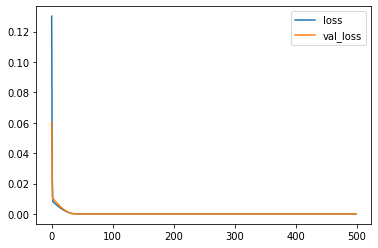

In [16]:
losses = pd.DataFrame(classifier.history.history)
losses[['loss', 'val_loss']].plot()

In [17]:
predictions = classifier.predict(x_test)

In [18]:
predictions

array([[0.70388615],
       [0.7309127 ],
       [0.7056675 ],
       [0.73202765],
       [0.6428373 ],
       [0.7035123 ],
       [0.65316725],
       [0.7212421 ],
       [0.7404411 ],
       [0.69968486],
       [0.7116252 ],
       [0.7045913 ],
       [0.7043154 ],
       [0.73970056],
       [0.7304032 ],
       [0.6989405 ],
       [0.6910815 ],
       [0.686311  ],
       [0.637097  ],
       [0.70336056],
       [0.74488723],
       [0.6805608 ],
       [0.7269769 ],
       [0.7169796 ],
       [0.70406103],
       [0.70805895],
       [0.71488297],
       [0.7062348 ],
       [0.66401756],
       [0.7881454 ],
       [0.73371553],
       [0.7169392 ],
       [0.65264857],
       [0.7156261 ],
       [0.6407504 ],
       [0.7027161 ],
       [0.74595094],
       [0.7467351 ],
       [0.70012665],
       [0.7077408 ],
       [0.7256894 ],
       [0.69446933],
       [0.73525536],
       [0.751606  ],
       [0.6965736 ],
       [0.6577636 ],
       [0.7136929 ],
       [0.761

In [19]:
print(predictions.shape)
print(y_test.shape)

(194, 1)
(194, 1)


In [20]:
(np.sum(np.abs(((y_test - predictions)*100)/y_test)))/194

Cl    0.217582
dtype: float64

In [21]:
y_test

,Cl
244,0.701956
467,0.729844
836,0.704604
557,0.732964
70,0.635680
...,...
960,0.729225
576,0.690980
767,0.670709
33,0.620786


In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(r2)

0.9954453035899143


In [23]:
from sklearn.metrics import mean_absolute_percentage_error
print("MSE = ", mean_absolute_percentage_error(y_test, predictions))

MSE =  0.002175815495278944


In [24]:
predictions

array([[0.70388615],
       [0.7309127 ],
       [0.7056675 ],
       [0.73202765],
       [0.6428373 ],
       [0.7035123 ],
       [0.65316725],
       [0.7212421 ],
       [0.7404411 ],
       [0.69968486],
       [0.7116252 ],
       [0.7045913 ],
       [0.7043154 ],
       [0.73970056],
       [0.7304032 ],
       [0.6989405 ],
       [0.6910815 ],
       [0.686311  ],
       [0.637097  ],
       [0.70336056],
       [0.74488723],
       [0.6805608 ],
       [0.7269769 ],
       [0.7169796 ],
       [0.70406103],
       [0.70805895],
       [0.71488297],
       [0.7062348 ],
       [0.66401756],
       [0.7881454 ],
       [0.73371553],
       [0.7169392 ],
       [0.65264857],
       [0.7156261 ],
       [0.6407504 ],
       [0.7027161 ],
       [0.74595094],
       [0.7467351 ],
       [0.70012665],
       [0.7077408 ],
       [0.7256894 ],
       [0.69446933],
       [0.73525536],
       [0.751606  ],
       [0.6965736 ],
       [0.6577636 ],
       [0.7136929 ],
       [0.761